# Visualizing the results of schedulers simulation

## Define needed functions and variables

In [1]:
import matplotlib.pyplot as plt
import sys
import json
import numpy as np
import numpy.random as random
sys.path.append('../')  # Include parent directory in module search
sys.path.append('../../')
from schedule_simulator_core.core import Distribution
from schedule_simulator_core.simulation_presets import GpuNetworkSchedulingSim
from schedule_simulator_core.schedulers import FIFOScheduler, TopologicalPriorityScheduler
from schedule_simulator_core.DAGs import serialize_dag, deserialize_dag, HomogeneousLinearDAG, \
LinearDag, LayerFactory
from model_extraction.keras_model_extractor import apply_timing_profile_to_dag, keras_model_to_DAG

#### Define schedulers

In [2]:
schedulers = [FIFOScheduler(), TopologicalPriorityScheduler(preemptive=False),
              TopologicalPriorityScheduler(preemptive=True)]

#### Visualization function

In [3]:
def line_plot(results, x, y, save_prefix=None):
    plt.figure(figsize=(16,8))
    if isinstance(x, str):
        x_label = x
    else:
        x_label = x.__name__
    if isinstance(y, str):
        y_label = y
    else:
        y_label = y.__name__
    plt.title("{} vs {}".format(y_label,x_label))
    for scheduler in results:
        num_of_simulations = len(results[scheduler]["time"])
        if isinstance(x, str):
            if x == "sim":
                xx = range(1,num_of_simulations+1)
            else:
                xx = results[scheduler][x]
        else:
            xx = x(results, scheduler)
        if isinstance(y, str):
            if y == "sim":
                yy = range(1,num_of_simulations+1)
            else:
                yy = results[scheduler][y]
        else:
            yy = y(results, scheduler)
        plt.plot(xx, yy, label=scheduler, marker="o")
        plt.xlabel(x_label)
        plt.ylabel(y_label)
    plt.legend()
    if save_prefix:
        plt.savefig("{}_{}_vs_{}.png".format(save_prefix, y_label, x_label))

## VGG16 DAG simulation

In [5]:
with open("../../model_extraction/dags/VGG16.dag") as dag_file:
    base_dag = deserialize_dag(dag_file.read())

In [7]:
results = GpuNetworkSchedulingSim.run_simulations_group(base_dag, schedulers=schedulers, network_rates=[1.],
                                                        batch_sizes=[1,2,4,8,16], nums_of_batches=[10])

num_of_batches  : 10
batch_size      : 16
network_rate    : 1.0 Gbps


### Load simulation results from file

In [15]:
# Load simulations results from file
sim_name = "VGG16"
with open("{}.sims.json".format(sim_name)) as file:
    results = json.load(file)

### Visualize results

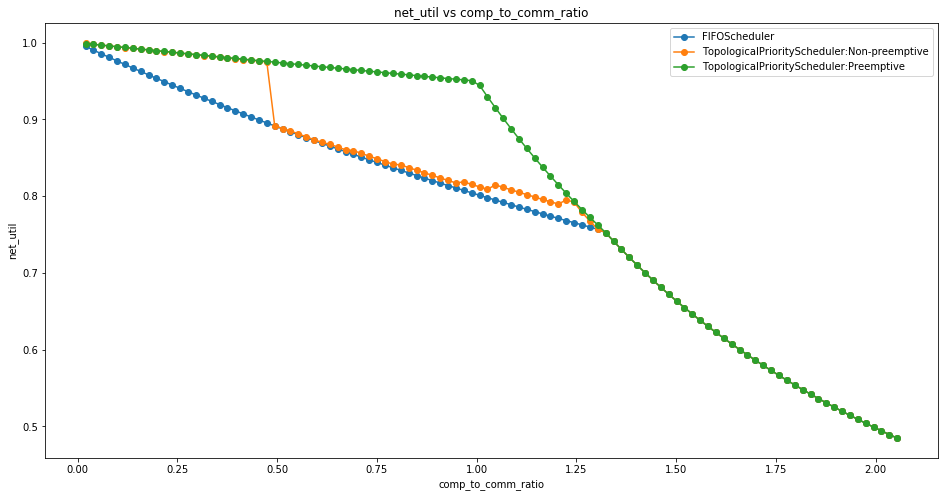

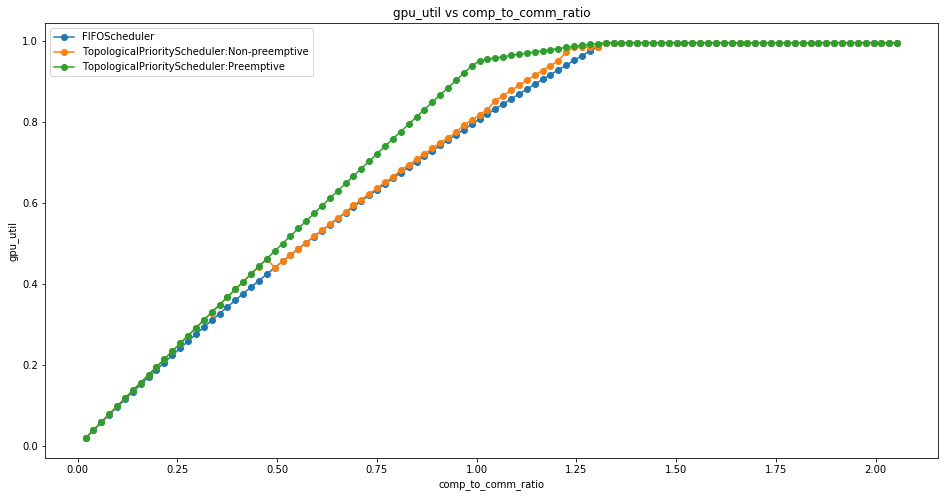

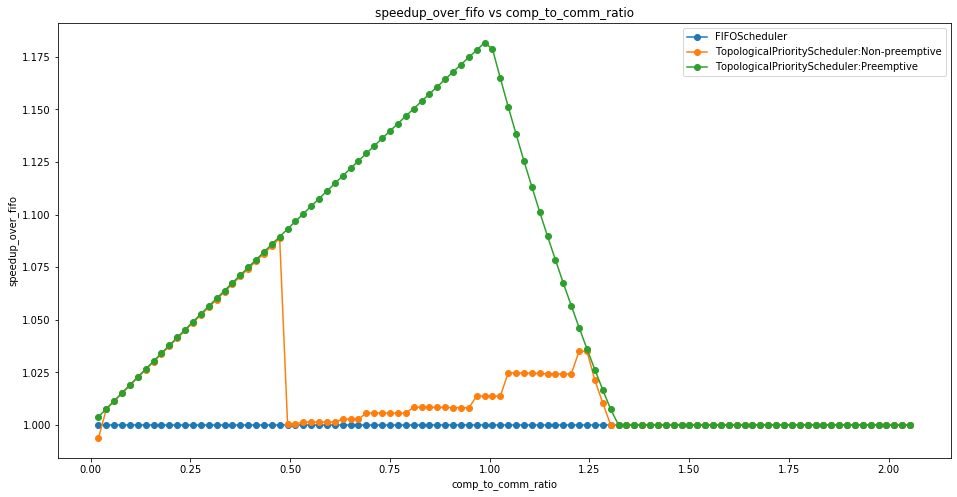

In [16]:
line_plot(results, x=comp_to_comm_ratio, y="net_util", save_prefix = sim_name)
line_plot(results, x=comp_to_comm_ratio, y="gpu_util", save_prefix = sim_name)
line_plot(results, x=comp_to_comm_ratio, y=speedup_over_fifo, save_prefix = sim_name)